In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '04a_LAB_KMeansClustering.ipynb',
 '04b_DEMO_Distance_Dimensionality.ipynb',
 '04c_LAB_Clustering_Methods.ipynb',
 '04d_DEMO_Dimensionality_Reduction.ipynb',
 '04e_DEMO_nmf.ipynb',
 'data',
 'Evaluating Unsupervised Learning.pdf',
 'UnsupervisedLearning_PeerGradedAssignment.docx',
 'UnsupervisedLearning_PeerGradedAssignment.ipynb',
 '[UCI] AAAI-13 Accepted Papers - Papers.csv']

In [2]:
import pandas as pd, numpy as np, seaborn as sns

headers=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight', 'Rings']
df = pd.read_csv('data/abalone.data', names=headers)
df.shape

(4177, 9)

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
pd.DataFrame([(x, df[x].nunique()) for x in df.columns], columns=['Column','No. of unique values'])

,Column,No. of unique values
0,Sex,3
1,Length,134
2,Diameter,111
3,Height,51
4,Whole weight,2429
5,Shucked weight,1515
6,Viscera weight,880
7,Shell weight,926
8,Rings,28


In [6]:
float_columns = [x for x in df.columns if df[x].dtype == np.float64]

skew_columns = (df[float_columns]
               .skew()
               .sort_values(ascending=False))

skew_columns

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

Text(0.5, 1.0, 'Before Log Transformation')

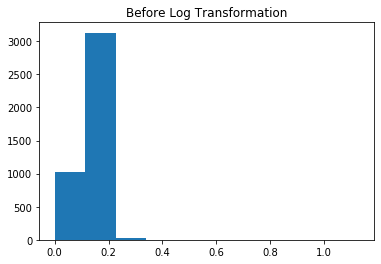

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['Height'])
plt.title('Before Log Transformation')

In [8]:
log_heights = np.log1p(df['Height'])
log_heights.sort_values(ascending=True)

3996    0.000000
1257    0.000000
236     0.009950
2169    0.014889
1174    0.014889
          ...   
1763    0.223144
1428    0.223144
2179    0.223144
1417    0.415415
2051    0.756122
Name: Height, Length: 4177, dtype: float64

Text(0.5, 1.0, 'After Log Transformation')

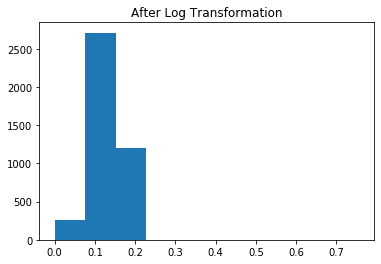

In [9]:
plt.hist(log_heights.values)
plt.title('After Log Transformation')

In [10]:
from scipy.stats.mstats import normaltest

print ('Before log transformation:', normaltest(df['Height']),'\n', 'After log transformation:', normaltest(log_heights) )

Before log transformation: NormaltestResult(statistic=3528.139040101244, pvalue=0.0) 
 After log transformation: NormaltestResult(statistic=1667.82776178447, pvalue=0.0)


In [11]:
print ('Before log transformation:', df['Height'].skew(),'\n', 'After log transformation:', log_heights.skew() )

Before log transformation: 3.1288173790659615 
 After log transformation: 1.099602282943724


Text(0.5, 1.0, 'After Sqrt Transformation')

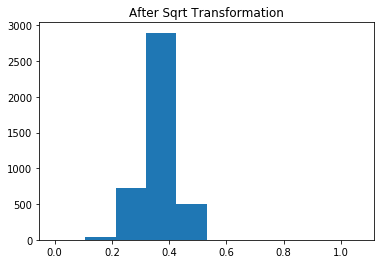

In [12]:
sqrt_heights = np.sqrt(df['Height'])
plt.hist(sqrt_heights.values)
plt.title('After Sqrt Transformation')

In [13]:
print ('Before sqrt transformation:', normaltest(df['Height']),'\n', 'After sqrt transformation:', normaltest(sqrt_heights) )
print ('Before sqrt transformation:', df['Height'].skew(),'\n', 'After sqrt transformation:', sqrt_heights.skew() )

Before sqrt transformation: NormaltestResult(statistic=3528.139040101244, pvalue=0.0) 
 After sqrt transformation: NormaltestResult(statistic=649.7123451187302, pvalue=8.255755931893605e-142)
Before sqrt transformation: 3.1288173790659615 
 After sqrt transformation: -0.29564050925436225


In [14]:
sqrt_heights_df=  pd.DataFrame(sqrt_heights)
sqrt_heights_df.rename(columns={'Height':'Sqrt_Height'}, inplace=True)
sqrt_heights_df

,Sqrt_Height
0,0.308221
1,0.300000
2,0.367423
3,0.353553
4,0.282843
...,...
4172,0.406202
4173,0.367423
4174,0.452769
4175,0.387298


In [15]:
df_trans = pd.concat([df,sqrt_heights_df], axis='columns')
df_trans

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sqrt_Height
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.308221
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.300000
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.367423
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.353553
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.282843
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.406202
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.367423
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.452769
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.387298


In [16]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
float_col = [x for x in df_trans.columns if df_trans[x].dtypes == np.float64]
df_trans[float_col] = s.fit_transform(df_trans[float_col])
df_trans.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sqrt_Height
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,15,-1.081207
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,7,-1.226890
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,9,-0.032048
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,10,-0.277846
4,I,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,7,-1.530942


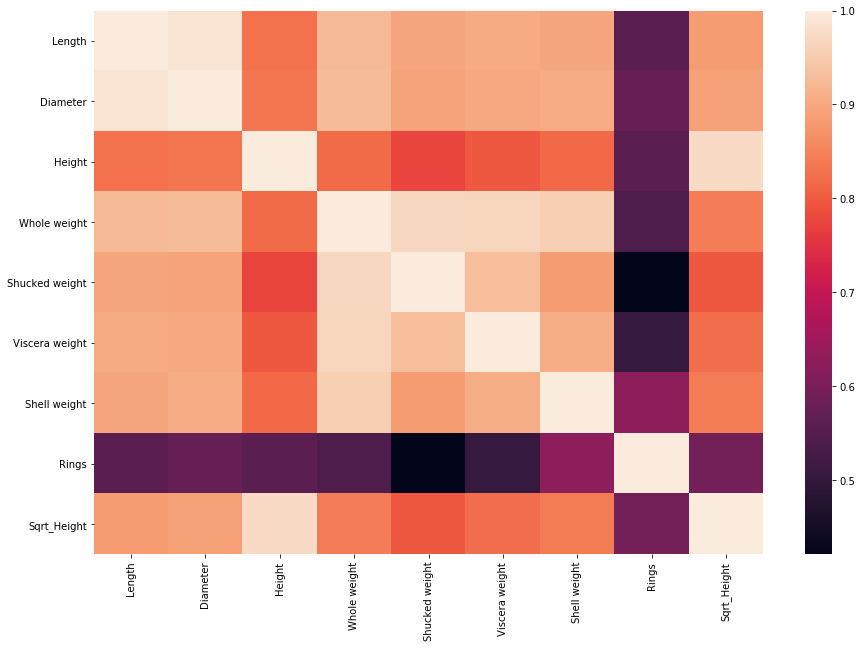

In [17]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_trans.corr())

In [18]:
corr_mat = df_trans[float_col].corr()

for x in range(len(float_col)):
    corr_mat.iloc[x,x]=0.0

corr_mat

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sqrt_Height
Length,0.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.883322
Diameter,0.986812,0.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.888117
Height,0.827554,0.833684,0.000000,0.819221,0.774972,0.798319,0.817338,0.973878
Whole weight,0.925261,0.925452,0.819221,0.000000,0.969405,0.966375,0.955355,0.843708
Shucked weight,0.897914,0.893162,0.774972,0.969405,0.000000,0.931961,0.882617,0.797910
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,0.000000,0.907656,0.822861
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,0.000000,0.841225
Sqrt_Height,0.883322,0.888117,0.973878,0.843708,0.797910,0.822861,0.841225,0.000000


In [19]:
corr_mat.abs().idxmax()

Length                  Diameter
Diameter                  Length
Height               Sqrt_Height
Whole weight      Shucked weight
Shucked weight      Whole weight
Viscera weight      Whole weight
Shell weight        Whole weight
Sqrt_Height               Height
dtype: object

In [20]:
sample = df_trans[['Sqrt_Height', 'Rings']]
sample

,Sqrt_Height,Rings
0,-1.081207,15
1,-1.226890,7
2,-0.032048,9
3,-0.277846,10
4,-1.530942,7
...,...,...
4172,0.655163,11
4173,-0.032048,10
4174,1.480404,9
4175,0.320164,10


Text(0, 0.5, 'Rings')

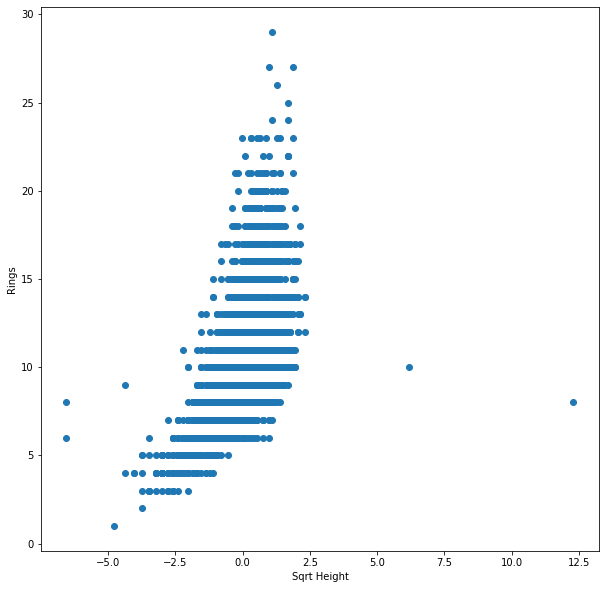

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(sample['Sqrt_Height'], sample['Rings'])
plt.xlabel('Sqrt Height')
plt.ylabel('Rings')

In [184]:
#mean shift
from sklearn.cluster import MeanShift
from numpy import arange

score_homo_ms  = {}
score_com_ms ={}

bw = 2.1
for i in arange(0.1, bw, 0.1):
    ms = MeanShift(bandwidth=i)
    ms.fit(sample)
    score_homo_ms[i] = metrics.homogeneity_score(sample['Rings'], ms.labels_)
    score_com_ms[i] = metrics.completeness_score(sample['Rings'], ms.labels_)


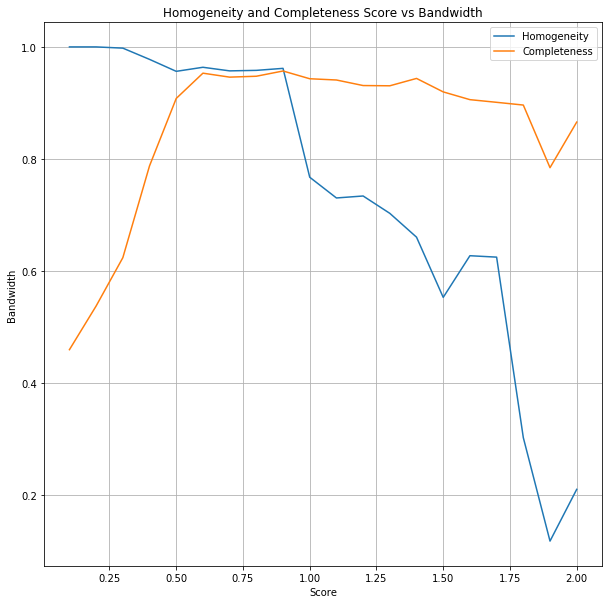

In [188]:
Fig, ax = plt.subplots(figsize=(10,10)) 
score_homo_ms_df = pd.DataFrame.from_dict(score_homo_ms, orient='index').rename(columns={0:'score_homo'})
score_com_ms_df = pd.DataFrame.from_dict(score_com_ms, orient='index').rename(columns={0:'score_com'})
ax.plot(arange(0.1, bw, 0.1),score_homo_ms_df['score_homo'], label='Homogeneity' )
ax.plot(arange(0.1, bw, 0.1),score_com_ms_df['score_com'], label='Completeness')
ax.set(title='Homogeneity and Completeness Score vs Bandwidth',
      xlabel='Score',
      ylabel='Bandwidth')
ax.legend()
ax.grid()

In [190]:
ms = MeanShift(bandwidth=0.9)
ms.fit(sample)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

[Text(0, 0.5, 'Rings'),
 Text(0.5, 0, 'Sqrt_Height'),
 Text(0.5, 1.0, 'Sqrt_Height vs Rings')]

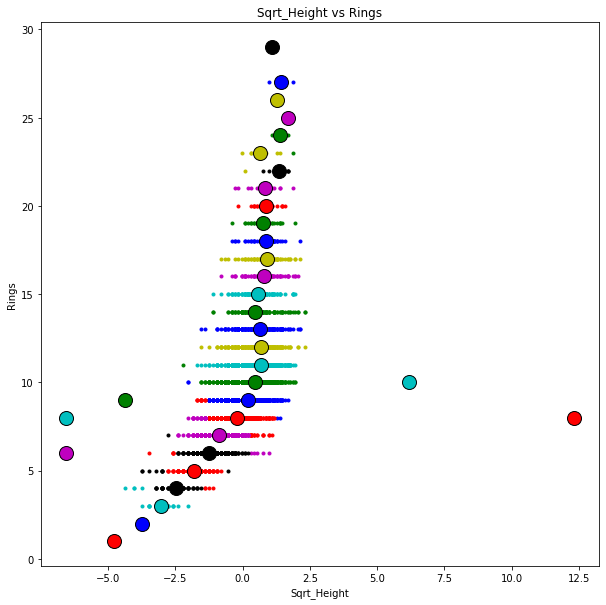

In [200]:
from itertools import cycle
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(sample['Sqrt_Height'][my_members], sample['Rings'][my_members], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
ax.set(title='Sqrt_Height vs Rings', 
       xlabel='Sqrt_Height',
       ylabel='Rings')

In [192]:
from sklearn import metrics
homo_ms = metrics.homogeneity_score(sample['Rings'], ms.labels_)
com_ms = metrics.completeness_score(sample['Rings'], ms.labels_)
score_ms = pd.DataFrame([homo_ms, com_ms]).rename(columns={0:'score_ms'}, index={0:'homogeneity', 1:'complete'})
score_ms

,score_ms
homogeneity,0.961729
complete,0.957028


In [164]:
#ward
from sklearn.cluster import AgglomerativeClustering

score_homo_ward  = {}
score_com_ward ={}

for i in range(1, 20):
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agg.fit(sample)
    labels = agg.labels_
    score_homo_ward[i] = metrics.homogeneity_score(sample['Rings'], labels)
    score_com_ward[i] = metrics.completeness_score(sample['Rings'], labels)

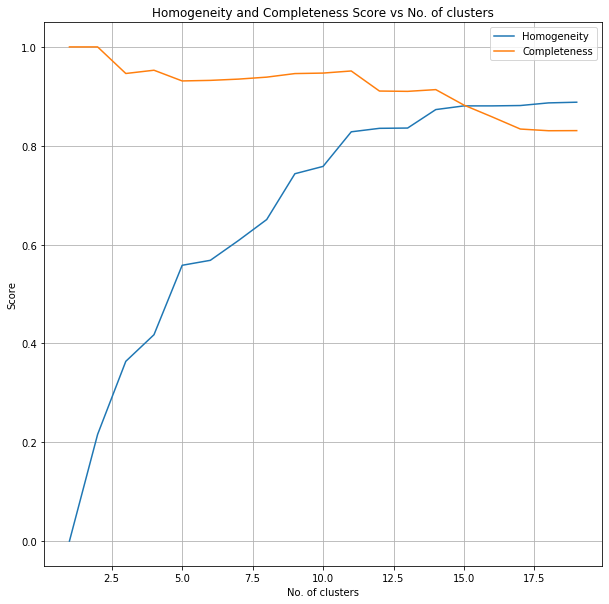

In [202]:
Fig, ax = plt.subplots(figsize=(10,10)) 
score_homo_ward_df = pd.DataFrame.from_dict(score_homo_ward, orient='index').rename(columns={0:'score_homo'})
score_com_ward_df = pd.DataFrame.from_dict(score_com_ward, orient='index').rename(columns={0:'score_com'})
ax.plot(range(1,20),score_homo_ward_df['score_homo'], label='Homogeneity' )
ax.plot(range(1,20),score_com_ward_df['score_com'], label='Completeness')
ax.set(title='Homogeneity and Completeness Score vs No. of clusters',
      ylabel='Score',
      xlabel='No. of clusters')
ax.legend()
ax.grid()


In [176]:
agg = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
agg.fit(sample)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=15)

[Text(0, 0.5, 'Rings'),
 Text(0.5, 0, 'Sqrt_Height'),
 Text(0.5, 1.0, 'Sqrt_Height vs Rings')]

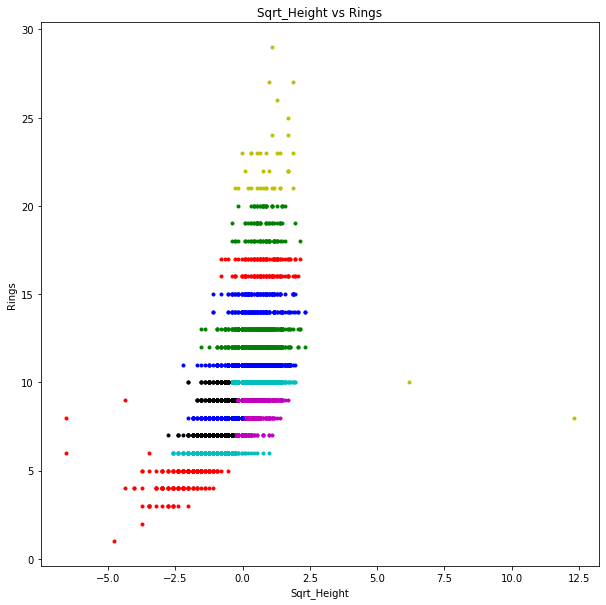

In [203]:
from itertools import cycle
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

labels = agg.labels_
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')


for k, col in zip(range(15), colors):
    my_members = labels == k
    plt.plot(sample['Sqrt_Height'][my_members], sample['Rings'][my_members], col + '.')
    
ax.set(title='Sqrt_Height vs Rings', 
       xlabel='Sqrt_Height',
       ylabel='Rings')

In [193]:
from sklearn import metrics
homo_ward = metrics.homogeneity_score(sample['Rings'], agg.labels_)
com_ward = metrics.completeness_score(sample['Rings'], agg.labels_)
score_ward = pd.DataFrame([homo_ward, com_ward]).rename(columns={0:'score_ward'}, index={0:'homogeneity', 1:'complete'})
score_ward

,score_ward
homogeneity,0.880659
complete,0.882230


In [134]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from numpy import arange

Eps = 3
min_sam = 5.5
score_homo_db={}
score_com_db ={}

for i in arange(0.1, Eps, 0.1):
    for j in arange(0.5, min_sam, 0.5):
        db = DBSCAN(eps = i, min_samples = j)
        db.fit(sample)
        labels = db.labels_
        score_homo_db[(i,j)] = metrics.homogeneity_score(sample['Rings'], labels)
        score_com_db[(i,j)] = metrics.completeness_score(sample['Rings'], labels)

In [139]:
score_homo_db_df = pd.DataFrame.from_dict(score_homo_db, orient='index').rename(columns={0:'score_homo'})
score_homo_db_df.sort_values(by='score_homo', ascending=False).head(20)

,score_homo
"(0.1, 0.5)",1.000000
"(0.1, 1.0)",1.000000
"(0.9, 0.5)",1.000000
"(0.5, 0.5)",1.000000
"(0.5, 1.0)",1.000000
"(0.7000000000000001, 0.5)",1.000000
"(0.7000000000000001, 1.0)",1.000000
"(0.30000000000000004, 1.0)",1.000000
"(0.30000000000000004, 0.5)",1.000000
"(0.8, 0.5)",1.000000


In [140]:
score_com_db_df = pd.DataFrame.from_dict(score_com_db, orient='index').rename(columns={0:'score_com'})
score_com_db_df.sort_values(by='score_com', ascending=False).head(20)

,score_com
"(0.9, 2.0)",0.996664
"(0.9, 1.5)",0.996664
"(0.9, 5.0)",0.996660
"(0.9, 4.5)",0.996660
"(0.9, 4.0)",0.996660
"(0.9, 3.5)",0.996660
"(0.9, 3.0)",0.996660
"(0.9, 2.5)",0.996660
"(0.9, 1.0)",0.996539
"(0.9, 0.5)",0.996539


In [141]:
db = DBSCAN(eps = 0.9, min_samples = 2)
db.fit(sample)
np.unique(db.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22], dtype=int64),
 array([ 10, 103, 391, 688, 633, 566,  26,  67,  32, 126, 487, 267,  42,
        203, 115,  57, 258,  14,  58,   6,  15,   9,   2,   2], dtype=int64))

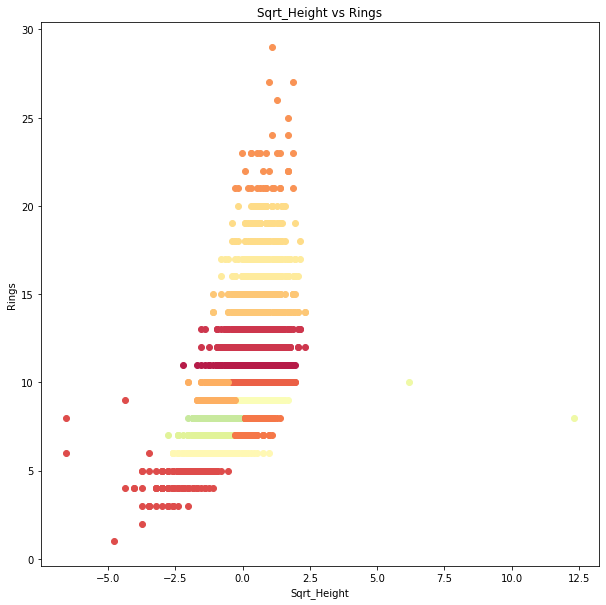

In [204]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

sample_db = sample.copy()
db_labels_df = pd.DataFrame(labels).rename(columns={0:'db_labels'})
sample_db = pd.concat([sample_db, db_labels_df], axis='columns')

labels = db.labels_
unique_labels = set(labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

color_dict={}
for i in range(len(np.unique(labels))):
    if np.unique(labels)[i] == -1:
        color_dict[np.unique(labels)[i]] = [0,0,0,1]
    else:
        color_dict[np.unique(labels)[i]] = tuple(colors[i])
        
for row in range(sample_db.shape[0]):
    plt.plot(sample_db['Sqrt_Height'][row], sample_db['Rings'][row], 'o', color = color_dict[sample_db['db_labels'][row]])


ax.set(title='Sqrt_Height vs Rings',
      xlabel='Sqrt_Height',
      ylabel='Rings')
plt.show()

In [194]:
from sklearn import metrics
homo_db = metrics.homogeneity_score(sample['Rings'], db.labels_)
com_db = metrics.completeness_score(sample['Rings'], db.labels_)
score_db = pd.DataFrame([homo_db, com_db]).rename(columns={0:'score_db'}, index={0:'homogeneity', 1:'complete'})
score_db

,score_db
homogeneity,0.997925
complete,0.996664


In [196]:
overall_score= pd.concat([score_ms,score_ward,score_db], axis='columns')
overall_score

,score_ms,score_ward,score_db
homogeneity,0.961729,0.880659,0.997925
complete,0.957028,0.882230,0.996664
